# P03 - Time series analysis with Pandas

This tutorial introduces the time-series analysis features of Python.  It introduces the Datetime object, which handles calculations involving periods of time.  The Pandas module introduces two new objects: Dataframes, which are tables of data, and Series, which represent a single column or row.  We take advantage Pandas' datetime-based indexing to process time-series data.

### Setting up

In [5]:
# Import modules
import datetime as dt
import os
from pathlib import Path
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Show plots within notebooks
%matplotlib inline

# Show module versions
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
from matplotlib import __version__ as mplv
print('Matplotlib: {}'.format(mplv))

# Setup working directories
CURRENT_DIR = Path.cwd()
DATA_DIR = CURRENT_DIR.parent / 'data'
RESULTS_DIR = CURRENT_DIR.parent / 'results'

Python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Pandas: 2.2.2
Numpy: 1.26.4
Matplotlib: 3.8.4


### Creating datetime objects

In [6]:
#  Directly enter year, month, day, hour etc.
dt.datetime(1955, 11, 12, 22, 4, 0)

datetime.datetime(1955, 11, 12, 22, 4)

In [7]:
#  Read from formatted text string (See strftime.org for codes)
dt.datetime.strptime('26 October 1985, 01:21:59 am', '%d %B %Y, %I:%M:%S %p')

datetime.datetime(1985, 10, 26, 1, 21, 59)

In [8]:
#  Get current time from function
dt.datetime.now()

datetime.datetime(2025, 1, 20, 20, 10, 47, 655028)

### Timedelta objects represent time spans

In [10]:
#  Timedelta objects represent the difference between to datetimes.
departure = dt.datetime.strptime('26 October 1985, 01:21:59 am', '%d %B %Y, %I:%M:%S %p')
delta = dt.datetime.now() - departure
print(delta)

14331 days, 18:49:14.009871


In [11]:
#  You can define timedelta based on number of days, seconds and microseconds.  (Why not months or years?)
delta = dt.timedelta(1, 1, 1)
print(delta)

1 day, 0:00:01.000001


In [12]:
#  You can specify them by named keys
delta = dt.timedelta(seconds=864000)
print(delta)

10 days, 0:00:00


In [13]:
#  The total_seconds() function converts into seconds.
delta = dt.timedelta(1, 1, 1)
print(delta.total_seconds())

86401.000001


### Extracting information from datetime objects

In [14]:
#  Year, month, day etc. are attributes of the object
arrival = dt.datetime(1955, 11, 12, 22, 4, 0)
print(arrival.year)
print(arrival.hour)

1955
22


In [15]:
#  There are methods calculate number of days since Jan 01, 1 A.D.
print(arrival.toordinal())

713999


In [16]:
#  Or the day of the week (Monday = 0)
print(arrival.weekday())

5


In [17]:
#  The .strftime method writes a string in the specified format
arrival.strftime('%Y-%m-%d %H:%M:%S')

'1955-11-12 22:04:00'

### Datetime Exercises

1. Was Marty McFly's journey Back to the Future (departure and arrival times are defined above)
   longer or shorter than if he had travelled to now?
2. When will you be (or were you) 1 billion seconds old?
3. Change the arrival.strftime() string to print the arrival date as "04 minutes past 10 on 12 November 1955".

### Loading time series data in Pandas

This example uses temperatures of steam vents (fumaroles) on the crater of Volcán de Colima, Mexico, as measured by infrared camera during a night in 2006.

In [18]:
#  Create a Pandas dataframe reading data from a .csv file.  It can translate dates into datetime objects
infraredData = pd.read_csv(DATA_DIR / 'infrared_camera_data.csv', parse_dates=[0])
infraredData.set_index('DateTime', inplace=True)  # Set the datetime column as the index
infraredData.head(10)  # Print the first 10 values

,Fum1max,Fum2Max,Fum3Max,CraterMax,EFlankAvg,WFlankAvg
DateTime,,,,,,
2006-05-23 02:30:28,20.4,14.4,7.5,20.4,-1.1,-1.7
2006-05-23 02:30:33,17.6,12.3,5.5,17.6,-1.7,-2.3
2006-05-23 02:30:38,11.5,7.4,2.4,11.5,-2.6,-2.7
2006-05-23 02:30:43,13.8,9.4,4.1,13.8,-2.5,-2.7
2006-05-23 02:30:48,14.1,9.0,3.9,14.1,-3.1,-3.8
2006-05-23 02:30:53,9.6,6.3,2.0,9.6,-3.4,-3.1
2006-05-23 02:30:58,21.1,15.8,8.4,21.1,-2.1,-0.6
2006-05-23 02:31:03,31.3,23.2,14.4,31.3,0.8,0.2
2006-05-23 02:31:08,31.9,23.9,14.8,31.9,-0.6,0.6


<Axes: xlabel='DateTime'>

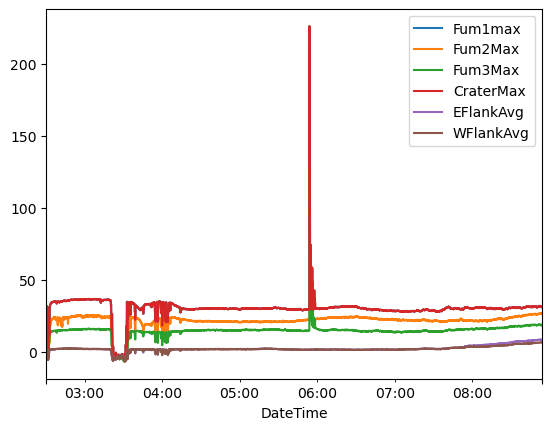

In [19]:
#  Plot the time series.
infraredData.plot()

In [20]:
#  Extract a column as a data series with dictionary-like notation
e_flank = infraredData['EFlankAvg']
e_flank.head()

DateTime
2006-05-23 02:30:28   -1.1
2006-05-23 02:30:33   -1.7
2006-05-23 02:30:38   -2.6
2006-05-23 02:30:43   -2.5
2006-05-23 02:30:48   -3.1
Name: EFlankAvg, dtype: float64

In [21]:
#  Extract 1 minute worth of rows by slicing the index with datetimes
rows = infraredData[dt.datetime(2006, 5, 23, 4, 0):dt.datetime(2006, 5, 23, 4, 1)]
rows

,Fum1max,Fum2Max,Fum3Max,CraterMax,EFlankAvg,WFlankAvg
DateTime,,,,,,
2006-05-23 04:00:03,20.7,13.1,6.3,20.7,-1.2,-1.9
2006-05-23 04:00:08,18.4,11.4,4.8,18.4,-1.4,-2.1
2006-05-23 04:00:13,28.3,17.8,10.4,28.3,-1.7,-2.1
2006-05-23 04:00:18,32.6,22.2,12.9,32.6,1.0,0.2
2006-05-23 04:00:23,34.7,22.5,13.9,34.7,1.9,1.4
2006-05-23 04:00:28,34.8,23.1,13.9,34.8,2.0,1.7
2006-05-23 04:00:33,34.8,22.9,14.0,34.8,2.1,1.9
2006-05-23 04:00:38,34.9,23.1,13.9,34.9,2.1,2.0
2006-05-23 04:00:43,34.7,23.1,14.0,34.7,2.2,2.0


### When was the explosion?

In [22]:
#  Find the row corresponding to the explosion (where temperature is max temperature)
explosion_status = infraredData['CraterMax'] == infraredData['CraterMax'].max()
explosion_status.head()  # This Series has False for all rows, except for the explosion

DateTime
2006-05-23 02:30:28    False
2006-05-23 02:30:33    False
2006-05-23 02:30:38    False
2006-05-23 02:30:43    False
2006-05-23 02:30:48    False
Name: CraterMax, dtype: bool

In [23]:
#  Extract the timestamp
explosion_time = infraredData.index[explosion_status]  # Get index values where explosion_status is True
explosion_time[0]  # Extract the first (only) value

Timestamp('2006-05-23 05:53:58')

<Axes: xlabel='DateTime'>

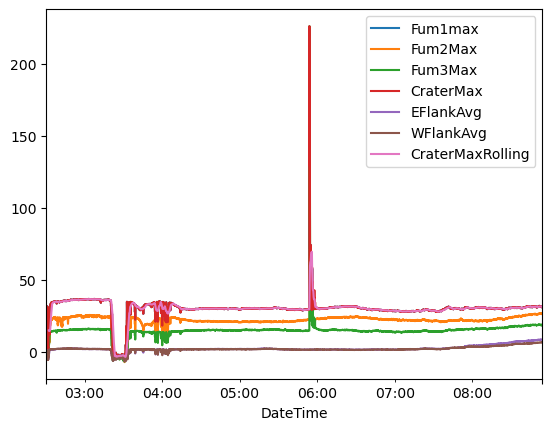

In [24]:
#  Add a column for the 2-minute rolling mean of the CraterMax temperature (24 x 5 second intervals)
infraredData['CraterMaxRolling'] = infraredData['CraterMax'].rolling(window=24).mean()
infraredData.plot()

### Calculating the mean fumarole temperatures

#### You can't trust daytime data because the sun heats the rocks

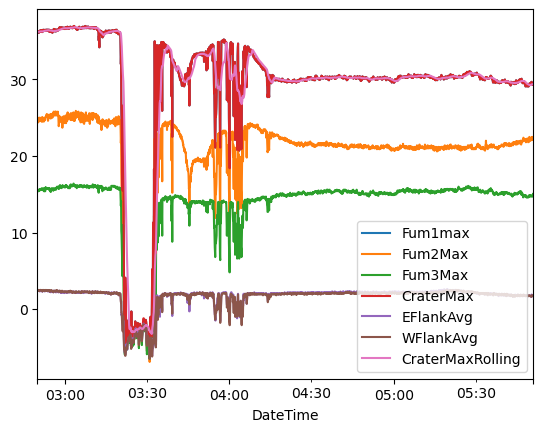

In [25]:
#  Use time index slicing to select time when data unaffected by sunlight or explosions (02:50 to 05:50).
night = infraredData['2006-05-23 02:50':'2006-05-23 05:50']
night.plot()
plt.legend(loc='lower right')

#### Clouds passing into view cause the temperature to drop and vary rapidly

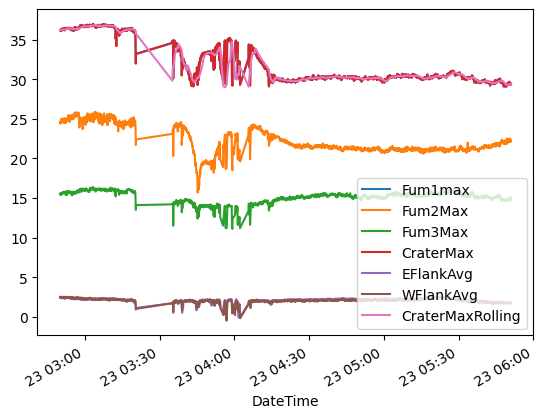

In [26]:
#  Drop data where clouds obscure the crater (and max temperature appears below 29°C)
cloud_free = (night['CraterMax'] > 29) & (night['CraterMaxRolling'] > 29)
no_clouds = night[cloud_free]
no_clouds.plot()
plt.legend(loc='lower right')

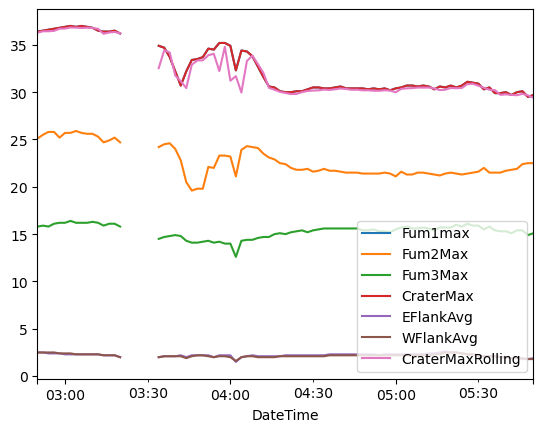

In [27]:
#  Resample to take 2 minute maximum values, dropping other cloud noise
max_2mins = no_clouds.resample('2min').max()
max_2mins.plot()
plt.legend(loc='lower right')

In [28]:
# The following are the fumarole temperature statistics for one night, unaffected by explosions, solar heating or sunshine
# A time series of these results shows long term changes at the volcano.
max_2mins.describe()

,Fum1max,Fum2Max,Fum3Max,CraterMax,EFlankAvg,WFlankAvg,CraterMaxRolling
count,85.000000,85.00000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,32.316471,22.64000,15.310588,32.316471,2.207059,2.162353,31.986176
std,2.581521,1.66313,0.693340,2.581521,0.175790,0.171114,2.537119
min,29.500000,19.60000,12.600000,29.500000,1.500000,1.600000,29.412500
25%,30.400000,21.50000,14.900000,30.400000,2.100000,2.100000,30.200000
50%,30.700000,21.90000,15.400000,30.700000,2.200000,2.200000,30.445833
75%,34.600000,24.10000,15.800000,34.600000,2.300000,2.200000,33.858333
max,37.000000,25.90000,16.400000,37.000000,2.600000,2.500000,36.837500


# Exercises

1. What percentage of the original data have we used in the max_2mins data?
2. Drop data within 10 minutes of explosion_time from infraredData

### _Footnote_
This analysis was the reason that I learned programming in the first place.  The time series datasets were just too large for Excel.  I learned Matlab to do it.  It took months and was hundreds of lines of code.  The simplicity of the Python version really highlights for me how scientific computing has come on in a decade.  For full results, see:
+ Stevenson, J. A., and N. Varley (2008), Fumarole monitoring with a handheld infrared camera: Volcán de Colima, Mexico, 2006-2007, Journal of Volcanology and Geothermal Research, 177(4), 911-924, doi:[10.1016/j.jvolgeores.2008.07.003](http://dx.doi.org/10.1016/j.jvolgeores.2008.07.003).